Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 0.3157 - val_accuracy: 0.9470 - val_loss: 0.1878
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9462 - loss: 0.1935 - val_accuracy: 0.9522 - val_loss: 0.2151
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9467 - loss: 0.1953 - val_accuracy: 0.9469 - val_loss: 0.1782
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9487 - loss: 0.1959 - val_accuracy: 0.9282 - val_loss: 0.2612
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9526 - loss: 0.1790 - val_accuracy: 0.9321 - val_loss: 0.2172
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9452 - loss: 0.2102 - val_accuracy: 0.9411 - val_loss: 0.2183
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9480 - loss: 0.1987 - val_accuracy: 0.9067 - val_loss: 0.3496
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9510 - loss: 0.1951 - 

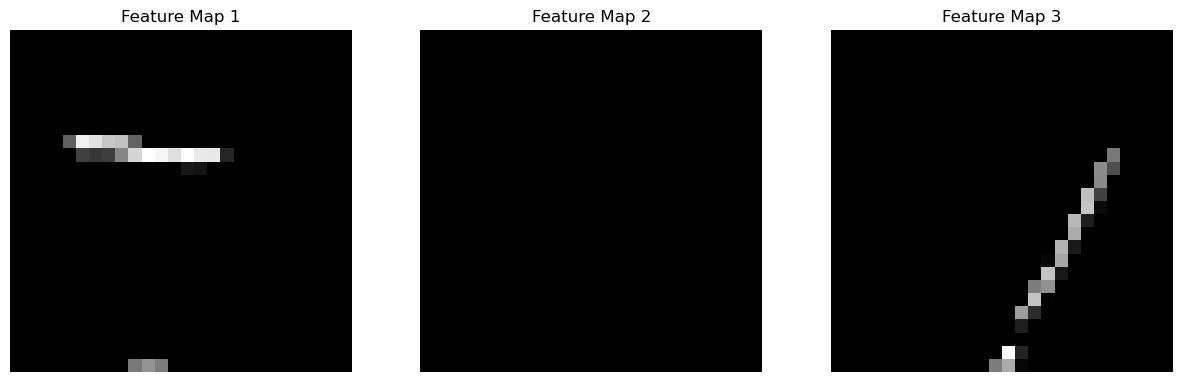

Baseline Test Accuracy: 0.9456


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(3, (3,3), activation='relu')(inputs) 
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

feature_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)

test_image = np.expand_dims(x_test[0], axis=0) 
feature_maps = feature_model.predict(test_image)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i].set_title(f'Feature Map {i+1}')
    axes[i].axis("off")

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline Test Accuracy: {test_acc:.4f}")
